In [5]:
## Importing basic packages
import os
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
os.getcwd()
os.chdir('C:\\Users\\Isha Pratibha Shetty\\projects\\ML PYTHON')

In [7]:
## Importing datasets
asia_trending = pd.read_csv("ASIA_trending.csv")
eu_trending = pd.read_csv("EU_trending.csv")
na_trending = pd.read_csv("NA_trending.csv")
videos = pd.read_csv("videos.csv")
category= pd.read_csv("Category_YT - Sheet1.csv")

# Cleaning and EDA

In [8]:
## each observation is a video that has trended in Asia, Europe or North America
## dataset gives out details like number of views acquired, comments recieved, likes/dislikes. 
## Datetime : trending_date
## factor_vector: ratings_disabled, comments disabled, video glitched/removed, country of origin.

In [9]:
videos.head()
## Each row has some basic essential details about different videos published on youtube.

,video_id,title,channel_title,category_id,publish_time
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14


In [10]:
## Creating one complete dataset appending Asia, Europe and NA dataframes. 
trending = asia_trending.append(eu_trending).append(na_trending)

In [11]:
## Cleaning the dataset and changing data types wherever necessary
trending['trending_date'] = pd.to_datetime(trending['trending_date'], format = '%y.%d.%m')
pd.isna(trending['views']).sum() #9850 na values detected
pd.isna(trending['comment_count']).sum() #7396 nan values detected

# splitting likes_dislikes column into separate columns and adding them back to the dataframe
#trending['likes/dislikes'].str.split(pat = '/', n = -1, expand = True)
trending.columns = ['video_id', 'trending_date', 'views', 'likes_dislikes', 
                    'comment_count', 'thumbnail_link', 'comments_disabled', 
                    'ratings_disabled', 'video_error_or_removed', 'country']

trending[['likes','dislikes']] = trending.likes_dislikes.str.split(pat = '/', expand = True)
trending["likes"] = trending['likes'].astype("int64")
trending["dislikes"] = trending['dislikes'].astype("int64")

## converting ratings_disabled and video_error_or_removed into numeric type
trending['ratings_disabled'] = trending['ratings_disabled'].astype('int64')
trending['video_error_or_removed'] = trending['video_error_or_removed'].astype('int64')

## Removing unwanted columns
trending = trending.drop(['thumbnail_link','likes_dislikes'], axis = 1)

In [12]:
## Merging videos df with Trending df to get the final dataset
category.rename(columns = {'ID':'category_id'}, inplace = True)
category.head()
trending0 = trending.merge(videos, on = 'video_id', how = 'left')
trending1 = trending0.merge(category, on = 'category_id', how = 'left')


trending1["country"].str.len()
trending1["country"] = trending1["country"].str.strip()

## Converting publish time into datetime object
trending1["publish_time"] = pd.to_datetime(trending1["publish_time"])

In [13]:
trending1.head()

,video_id,trending_date,views,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,country,likes,dislikes,title,channel_title,category_id,publish_time,Category name
0,kzwfHumJyYc,2017-11-14,1096327.0,882.0,0,0,0,India,33966,798,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,Film & Animation
1,zUZ1z7FwLc8,2017-11-14,590101.0,0.0,1,0,0,India,735,904,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,News & Politics
2,10L1hZ9qa58,2017-11-14,473988.0,149.0,0,0,0,India,2011,243,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Entertainment
3,N1vE8iiEg64,2017-11-14,1242680.0,2684.0,0,0,0,India,70353,1624,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,Comedy
4,kJzGH0PVQHQ,2017-11-14,464015.0,66.0,0,0,0,India,492,293,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,Entertainment


# Analysis

In [14]:
# Q1: In which country did youtube videos trend the most in the given span of time? 
trend_country = trending1.groupby('country').count().sort_values('video_id', ascending = False)["video_id"]
trend_country

## Youtube experiences the most number of trending videos in the US, while the least in Japan. 

country
US         42005
Canada     41902
Germany    41486
France     41237
UK         40401
India      33676
Japan      14762
Name: video_id, dtype: int64

In [15]:
# Q2: Which channel has trended the most number of times?
trend_channel = trending1.groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
trend_channel

## The most trending channel over Asia, Europe and North-America is 'The Late Show with Stephen Colbert'.

channel_title
The Late Show with Stephen Colbert    895
VikatanTV                             752
WWE                                   735
Late Night with Seth Meyers           718
TheEllenShow                          709
                                     ... 
NavylittleMonster                       1
Nayani Pavani                           1
Nayy                                    1
Naïtogym                                1
New Channel                             1
Name: video_id, Length: 21738, dtype: int64

In [16]:
## By country
# US
#trending1[trending1["country"] == "US"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in the US is INSIDER. 

# Canada
trending1[trending1["country"] == "Canada"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in Canada is 'VikatanTV'.

# Germany
trending1[trending1["country"] == "Germany"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in Germany is 'Galileo'.

# France
trending1[trending1["country"] == "France"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in France is 'Troom Troom FR'

# UK
trending1[trending1["country"] == "UK"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in the UK is 'PewDiePie'.

# India 
trending1[trending1["country"] == "India"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in India is 'ViketanTV'.

#Japan
trending1[trending1["country"] == "Japan"].groupby('channel_title').count().sort_values('video_id', ascending = False)["video_id"]
## The most trending channel in Japan is 'DHCテレビ '.'

## Interesting to see that the ViketanTV is the most trending channel in both India and Canada. 
## This could point towards there being some similarity in the tastes of viewers of both countries. 

channel_title
DHCテレビ           101
釣りよかでしょう。         85
MAX鈴木 TV          68
釣りよか飯             67
TV Derana         59
                ... 
avispachannel      1
awesome pets       1
b7777              1
baba46494649       1
nami channel       1
Name: video_id, Length: 4618, dtype: int64

In [17]:
# Q3: Which is the best time to publish a video on youtube such that it trends well? 
# This could be infered from analysing the publish time of the already trended videos. 

# Extract hour from the publish time 
def hr_func(ts):
    return ts.hour
trending1["hour"] = trending1["publish_time"].apply(hr_func)

trend_hour = trending1.groupby('hour').count().sort_values('video_id', ascending = False)["video_id"]
trend_hour

## From an inspection of the trend dataset, we can infer that an ideal time to publish a video on youtube (in the 3 continents, on an average) so that is become likely to trend is
## 3:00pm - 5:59pm

hour
16    22994
17    21153
15    18705
14    16304
18    14482
13    13695
19    12921
12    11474
20    11257
21    11166
11     9706
22     9230
10     8940
9      8610
5      8260
8      7693
4      7602
23     7084
3      5950
7      5945
1      5839
2      5610
0      5582
6      5267
Name: video_id, dtype: int64

In [18]:
trending1[trending1["country"] == "India"].groupby('hour').count().sort_values('video_id', ascending = False)["video_id"]
## Specifically in India, a more suitable time would be 12-2 pm. 

hour
12    2522
14    2505
13    2430
11    2082
6     2030
16    1965
15    1934
5     1930
7     1909
10    1876
8     1838
4     1805
9     1675
17    1389
3     1209
2      902
18     735
1      513
22     481
23     479
19     471
0      352
21     331
20     313
Name: video_id, dtype: int64

In [19]:
#Q4(a): Which channel seems to capitalize on bad fame i.e. it trends via videos which garners more likes < dislikes? 
#trending1[trending1["likes"] < trending1["dislikes"]].groupby("channel_title").count().sort_values(by = "dislikes", ascending = False)
disliked_channels = trending1[trending1["likes"] < trending1["dislikes"]]
disliked_channels = disliked_channels.drop_duplicates(subset = ["video_id"], keep = "last")
pd.set_option('display.max_rows', None)
disliked_channels.groupby("channel_title").count().sort_values(by = "dislikes", ascending = False)['dislikes']

## The channel 'focus nachrichten' has created the most number of trending videos which has more dislikes than likes. 
## We could speculate that the creator make controversial, disturbing or unconventional videos.
## To further confirm our hypothesis, we check for the creator's popular videos that have more likes than dislikes.

channel_title
focus nachrichten                                      26
Россия 24                                              24
Actualités 24h                                         17
ABN Telugu                                             17
Top News                                               17
LeGossipTube                                           16
SANTÉ ZEVO                                             15
Celebridades News                                      13
Mazhavil Manorama                                      12
Les News                                               11
CNN                                                    10
ANNnewsCH                                               9
phoenix                                                 9
Vip Nachrichten                                         8
Deutschland Talk Show                                   8
Frank channel                                           8
First Show                                              8


In [20]:
print(trending1[trending1["channel_title"] == "focus nachrichten"].drop_duplicates(subset = ["video_id"], keep = "last").shape) #39 distinct publishes
## Focus Nachriten has 26 distict videos where likes < dislikes. The total videos that it has published is 39. 
26/39*100
## 66% of his videos have more dislikes than likes.
## Hence it could be reasonably infered that it capitalizes on disturbing or disliked content. 

(39, 16)


66.66666666666666

In [21]:
# Q4(b): Which category seems to capitalize on bad fame i.e. it trends via videos which garners more likes < dislikes? 
disliked_category = trending1[trending1["likes"] < trending1["dislikes"]]
disliked_category = disliked_category.drop_duplicates(subset = ["video_id"], keep = "last")
disliked_category.shape
pd.set_option('display.max_rows', None)
print(disliked_category.groupby("Category name").count().sort_values(by = "dislikes", ascending = False)['dislikes'])
## Entertainment Category has 617 distict videos where likes < dislikes.

Category name
Entertainment            617
News & Politics          540
People & Blogs           384
Sports                    89
Film & Animation          55
Gaming                    39
Comedy                    31
Music                     25
Howto & Style             21
Autos & Vehicles          20
Science & Technology      14
Nonprofits & Activism     11
Travel & Events            8
Education                  7
Name: dislikes, dtype: int64


In [22]:
print(trending1[trending1["Category name"] == "Entertainment"].drop_duplicates(subset = ["video_id"], keep = "last").shape)
## The total videos that have trended in the Entertainment category is 34383. 

617/34383*100
## 1.79% of all videos of the genre capitalises on bad fame with controversial or unconventional content

(34383, 16)


1.794491463804787

In [23]:
# Q5. What is the engagement rate of each genre/category of videos?
# Engagement is defined as the number of people who either like, dislike or comment on the video, per 100 viewers of the video
# Engagement=(likes+dislikes+comments)/view

#Dropping the videos that have comments or ratings disables
engagement_df1 = trending1[trending1['comments_disabled']!=1]
engagement_df = engagement_df1[engagement_df1['ratings_disabled']!=1]
engagement_df=engagement_df.dropna()

engagement_df['engagement'] = (engagement_df['likes']+engagement_df['dislikes']+engagement_df['comment_count'])/engagement_df['views']*100
engagement_by_genre = engagement_df.groupby('Category name').mean().sort_values('engagement', ascending = False)["engagement"]
engagement_by_genre
## The most engagement is observed in 'Nonprofits & Activism' videos with 7% of the viewers either rating the video (likes/dislikes) or commenting on it. 

Category name
Nonprofits & Activism    7.069187
Education                6.007838
Gaming                   5.834218
Comedy                   5.824882
Howto & Style            5.655352
Science & Technology     5.510621
Music                    4.987386
Pets & Animals           4.795494
Autos & Vehicles         4.123958
Travel & Events          4.032876
People & Blogs           3.908369
Entertainment            3.522945
Film & Animation         3.415926
News & Politics          2.815120
Sports                   2.598347
Name: engagement, dtype: float64

,count,mean,std,min,25%,50%,75%,max
comments_disabled,,,,,,,,
0,249362.0,51660.751398,193677.000327,0.0,1182.0,6161.0,28289.75,5613827.0
1,6107.0,8607.504012,27010.149129,0.0,0.0,379.0,3595.00,499673.0


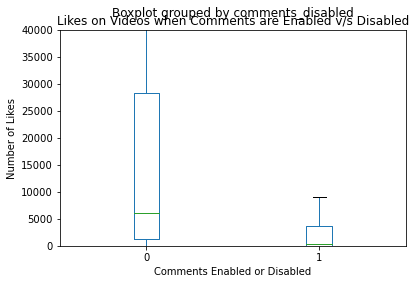

In [24]:
# Q6. What is the impact of the creator disabling comments on the video's likes & dislikes?
## For this, we plot a boxplot to ascertain the IQR of likes when (i) comments are enabled & (ii) comments are disabled
Boxplot_likes = trending1.boxplot(by ='comments_disabled', column =['likes'], grid = False, showfliers = False)
Boxplot_likes.set_ylim(0,40000)
Boxplot_likes.set_title('Likes on Videos when Comments are Enabled v/s Disabled')
Boxplot_likes.set_xlabel('Comments Enabled or Disabled')
Boxplot_likes.set_ylabel('Number of Likes')
trending1['likes'].groupby(trending1['comments_disabled']).describe()

## The IQR of the amount of likes on a video is wider & higher when the comment section is enabled. This also means greater engagement.

Text(0, 0.5, 'Number of Dislikes')

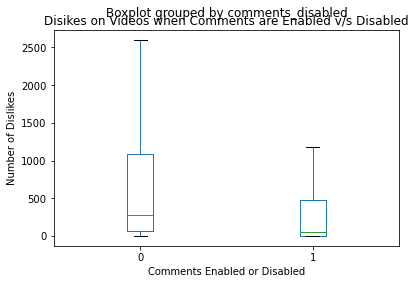

In [25]:
#Plotting a boxplot to ascertain the IQR of dislikes when (i) comments are enabled & (ii) comments are disabled
Boxplot_dislikes = trending1.boxplot(by ='comments_disabled', column =['dislikes'], grid = False, showfliers = False)
Boxplot_dislikes.set_title('Disikes on Videos when Comments are Enabled v/s Disabled')
Boxplot_dislikes.set_xlabel('Comments Enabled or Disabled')
Boxplot_dislikes.set_ylabel('Number of Dislikes')

## The IQR of the amount of dislikes on a video is wider & higher when the comment section is enabled. This also means greater engagement.

In [26]:
#Q7. What is the penetration of Youtube (specifically trending videos) in the listed countries?
trending_2=trending1.dropna()
activeness = trending_2.groupby('country').mean().sort_values('views', ascending = False)["views"]
type(activeness)

# Activeness is a series. Converting it into a data frame
country_activeness=activeness.to_frame()
country_activeness

#The names of the country is given as an index. Adding a column 
country_activeness['country']=['UK', 'US', 'Canada', 'India', 'Germany', 'France', 'Japan']
#Adding a column with the population of the respective countries in 2018
country_activeness['population']=[6.610000e+07,3.251000e+08 , 3.650000e+07, 1.338700e+09, 82700000, 6.690000e+07, 1.268000e+08]
country_activeness

activeness = (country_activeness['views'])/ (country_activeness['population'])*1000
activeness.sort_values(ascending = False)
## The highest penetration of Youtube (limited to trending videos) is in the UK with 92 per 1000 people watching the videos. 
## After a huge margin, this is followed by Canada with 31 per 1000 people.

country
UK         92.578286
Canada     31.973520
Germany     7.442596
US          7.324319
France      6.343735
Japan       2.025271
India       0.758460
dtype: float64

In [34]:
## Q8: Which video has trended the most number of time in the entire dataset? 
trending1.value_counts(["title"])

# "Drake - Nice For What" is the most trending video in the dataset. It has trended 96 times
df = trending1.groupby("title")
df = df.agg({"trending_date": "nunique"})
df = df.reset_index()
df[df["title"] == "Drake - Nice For What"] 

df = trending1.groupby("title")
df = df.agg({"country": "nunique"})
df = df.reset_index()
df[df["title"] == "Drake - Nice For What"]

# This video trended for a total of 31 days and in 5 countries. 

,title,country
23083,Drake - Nice For What,5


In [37]:
## Q9: How many videos have trended across all 7 countries? 
df = trending1.groupby("title")
df = df.agg({"country": "nunique"})
df = df.reset_index()
df[df["country"] == 7].shape

## 22 videos in the dataset have trended across all 7 countries. 

(22, 2)